In [4]:
# standard python utilities
import os
import sys
import glob
import pandas as pd
import numpy as np
import calendar
import time

# standard python plotting utilities
import matplotlib as mpl
import matplotlib.pyplot as plt

# standard geospatial python utilities
import pyproj # for converting proj4string
import shapely
import geopandas as gpd
import rasterio

# mapping utilities
import contextily as ctx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

# modflow utility
import flopy
import flopy.utils.binaryfile as bf


In [5]:
## Set up directory referencing
# Package data
git_dir = os.path.dirname(os.path.dirname(os.getcwd()))
git_dir = os.getcwd()
while os.path.basename(git_dir) != 'CosumnesRiverRecharge':
    git_dir = os.path.dirname(git_dir)
gwfm_dir = '\\'.join(str.split(git_dir,'\\')[0:3])+ '/Box/research_cosumnes/GWFlowModel'
print(git_dir, gwfm_dir)

C:\Users\andrewc\Documents\GitHub\CosumnesRiverRecharge C:\Users\andrewc/Box/research_cosumnes/GWFlowModel


In [6]:
# set box directory for output figures and data
box_dir = gwfm_dir+'/Levee_setback/levee_setback_distance_analysis/'
fig_dir = box_dir+'figures/'
data_dir = box_dir+'data_output/'

## Plotting head raster and contours

In [7]:
ext_dir = 'F:/WRDAPP'
c_dir = 'C:/WRDAPP'

if os.path.exists(ext_dir):
    loadpth = ext_dir 
elif os.path.exists(c_dir):
    loadpth = c_dir 

loadpth = loadpth +'/GWFlowModel/Cosumnes/levee_setback/setback_distance_analysis/'
model_ws = loadpth+'Permeameter_for_velocity'

In [4]:

name = 'MF.nam'
# name = 'MF_child.nam'
m = flopy.modflow.Modflow.load(name, model_ws=model_ws, 
                                exe_name='mf2005', version='mf2005')


In [5]:
# cbb = flopy.utils.CellBudgetFile(model_ws+'/MF.upw.cbc')
cbb = flopy.utils.CellBudgetFile(model_ws+'/MF.cbc')

hdobj = flopy.utils.HeadFile(model_ws+'/MF.hds')
spd_stp = hdobj.get_kstpkper()
times = hdobj.get_times()


In [6]:
# create dates to match totim
# strt_date = pd.to_datetime(m.dis.start_datetime)
# end_date = strt_date+pd.DateOffset(months=m.dis.nper-1)
# dates = strt_date+pd.to_timedelta(zb_df.index-1, unit = 'days')

In [7]:
# create dataframe referencing between date, totim and kstp,kper
# time_spd = pd.DataFrame(np.transpose(np.array([times,spd_stp],dtype='object')),columns = ['totim','spd_stp'])
# time_spd.index = dates
# time_spd.totim = pd.to_numeric(time_spd.totim)

## Load SFR grid for buffering

In [11]:
# dem data for cropping above land surface
dem_data = np.loadtxt(gwfm_dir+'/DIS_data/dem_52_9_200m_linear.tsv')

In [3]:
grid_sfr = gpd.read_file(gwfm_dir+'/SFR_data/final_grid_sfr/grid_sfr.shp')
grid_p = gpd.read_file(gwfm_dir+'/DIS_data/grid/grid.shp')
local_setback = gpd.read_file(gwfm_dir+'/levee_setback/local_levee_setback_rectangles/local_levee_setback_rectangles.shp')
local_setback = local_setback.dropna()

NameError: name 'gpd' is not defined

NameError: name 'local_setback' is not defined

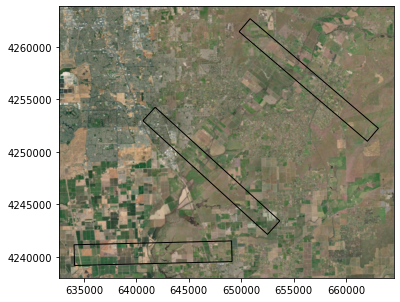

In [34]:
# random puts them too close together 
# grid_sfr.loc[np.random.randint(0,len(grid_sfr),size=(5))].plot()
# better to pick 5 unique locations based on regional setting
# Oneto-Denier (~200), Mahon Ranch (150), Teichert (100), Rooney (80), Michigan Bar (10)
fig,ax=plt.subplots(figsize=(6,6))
# grid_sfr.loc[[10, 80, 100, 150, 200]].plot('reach',ax=ax, legend=True)
local_setback.plot(color="None",ax=ax)
ctx.add_basemap(source = ctx.providers.Esri.WorldImagery, crs = 'epsg:26910', attribution=False,ax=ax)

plt.ticklabel_format(style='plain')

### Create 3D array of cells included in river setback

In [15]:
## instead of trying to crop the shapefile with the straightlines, just join the local rectangle to the model grid
## then after calculating all the levee setbacks simply apply a logical array based on where the rectangles are
local_setback_grid = gpd.overlay(grid_p, local_setback)

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:304: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for this_elem, other_elem in zip(left, right)
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:304: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for this_elem, other_elem in zip(left, right)
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:304: DeprecationWarn

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
buf_sfr = grid_sfr.copy()
setbacks = np.arange(0, 3400,200)
str_setbacks = np.zeros((len(setbacks),m.dis.nrow,m.dis.ncol))
# str_setbacks_local = np.zeros((len(setbacks),m.dis.nrow,m.dis.ncol))

# grid_sfr.plot()
for n in np.arange(0,len(setbacks)):
    buf_sfr.geometry = grid_sfr.buffer(setbacks[n])
    grid_sfr_buf = gpd.sjoin(grid_p,buf_sfr, how='right', lsuffix = 'grid', rsuffix = 'sfr',op='within')
    grid_sfr_buf = grid_sfr_buf.drop_duplicates('node_x')
    # clip to local setback sites
    grid_sfr_buf_clipped = gpd.sjoin(grid_sfr_buf,local_setback, op='intersects',how='right')
    # individually identify local setback sites in arrays
    for t in np.arange(0,3):
        clip_vals = grid_sfr_buf_clipped.loc[grid_sfr_buf_clipped.id==t+1,:]
#         str_setbacks_local[n,clip_vals.row_x.values-1,clip_vals.column_x.values-1] = t+1
    str_setbacks[n, grid_sfr_buf.row_x.values-1,grid_sfr_buf.column_x.values-1] = 1


C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

In [311]:
# pull out local sites only for setback analysis
local_grid_bool = np.zeros((m.dis.nrow,m.dis.ncol))
for n,s in enumerate(local_setback_grid.location.unique()):
    df = local_setback_grid[local_setback_grid.location==s]
    local_grid_bool[df.row-1, df.column-1] = n+1
# crop setbacks to the polygon widths
local_str_setbacks = str_setbacks*local_grid_bool

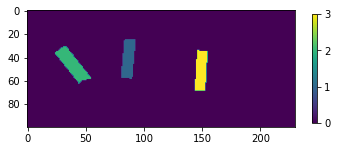

In [316]:
# local_grid_bool = np.zeros((m.dis.nrow,m.dis.ncol))
# local_grid_bool[local_setback_grid.row-1, local_setback_grid.column-1] = 1
plt.imshow(local_str_setbacks[16,:,:])
plt.colorbar(shrink=0.5)
plt.show()

In [ ]:
# code to set bounds of raster, but need to adjust to account for angle
#doesn't work with angle
# xmin, ymin, xmax, ymax = grid_p.geometry.total_bounds
# xmax, ymax = grid_p.geometry.bounds.max().loc[['maxx','maxy']]
# xmin, ymin = grid_p.geometry.bounds.min().loc[['maxx','maxy']]


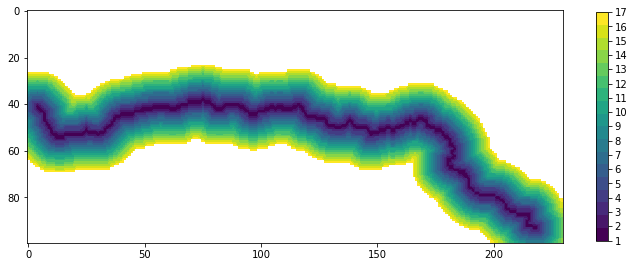

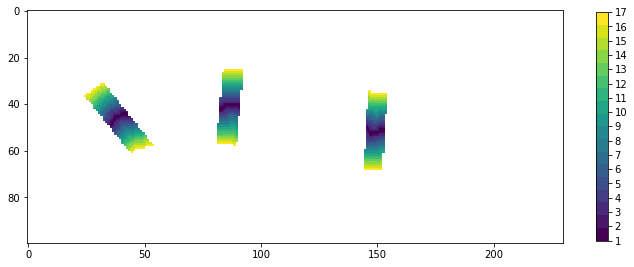

In [37]:
def plt_setbacks_labeled(str_setbacks, label):
    str_setbacks_plt = np.copy(str_setbacks)
    # make non-setback cells masked
    str_setbacks_plt = np.ma.masked_where(str_setbacks_plt==0, str_setbacks_plt)
    # flip cumsum to make first setback 1 and last setback 10
    str_setbacks_plt = (str_setbacks_plt.cumsum(axis=0)-(len(setbacks)+1))*-1

    # plot setbacks labeled 
    fig,ax = plt.subplots(figsize=(12,6))
    cmap = plt.get_cmap('viridis',len(setbacks)+1)
    im=ax.imshow(str_setbacks_plt[-1,:,:],  cmap=cmap, origin='upper',aspect=1)
    plt.colorbar(mappable = im, ax = ax, ticks = np.arange(0,len(setbacks)+1), shrink=0.7)
    # plt.savefig(fig_dir+'setback_distances_raster_'+label+'.png',dpi=600)
    
plt_setbacks_labeled(str_setbacks,'regional')
plt_setbacks_labeled(local_str_setbacks, 'local')

## Vertical Groundwater Velocity Analysis
Two methods:
1. Simply count the number of cells (area/volume) at land surface within the setback
2. Count the total number of groups of cells (requires upscaling?)

In [38]:
# fig,ax = plt.subplots(figsize=(8,8))

# mapview = flopy.plot.PlotMapView(model=m,ax=ax)
# linecollection = mapview.plot_grid(linewidths = 0.1)

extcbb = flopy.utils.postprocessing.get_extended_budget(cbb)

(qx, qy, qz) = flopy.utils.postprocessing.get_specific_discharge(vectors = extcbb, model=m)
# mapview.plot_vector(qx, qy, istep=10, jstep=10)
qz *= -1
qy *= -1
qx *= -1

In [39]:
# get percentiles to determine which to plot
qz_quants = np.percentile(qz, [0,25,50,75,99,99.9])
qz_quants

array([0.02073447, 0.08407731, 0.09596906, 0.11246872, 0.20386947,
       0.36971602])

In [192]:
# Add local path to sys.path for importing scripts
# sys.path.append(git_dir+'/01_python_scripts')
# sys.path

In [40]:
def elev_to_tprogs_layers(elev, tprogs_top_elev, tprogs_bot_elev, num_lays):
    """
    function to get the tprogs layers based on the given elevation
    Example
    layer 0 is 80 meters, layer 1 is 79.5 meters, layer -1 is -80 meters
    """
    lay_thick = (tprogs_top_elev - tprogs_bot_elev)/num_lays
    elev_round = np.round((elev) * (1/lay_thick)) / (1/lay_thick) # dem rounded to the layer thickness
    elev_round[elev_round >= tprogs_top_elev] = tprogs_top_elev# any elevation above the top is set to the top
    # subtract the calculated row from top elev divided by layer thickness to get to index 0 at top and index 320 and bottom
    elev_indices = tprogs_top_elev/lay_thick - elev_round*(1/lay_thick) 
    return(elev_indices.astype(int))

In [172]:
# tprogs_cleaning.get_tprogs_for_elev(dem_data)
tprogs_lay = elev_to_tprogs_layers(elev=dem_data,tprogs_top_elev=80, tprogs_bot_elev=-80, num_lays=320)
# elev_to_tprogs_layers?

In [173]:
rows = np.where(np.ones(tprogs_lay.shape)==1)[0]
cols = np.where(np.ones(tprogs_lay.shape)==1)[1]

Using 50th percentile means 50% would be connected and 75th would mean 25% are connected; but sand and gravel take up 24% of the domain volume (by TPROGs) so this should be the upper limit of cells connected, at least the 76th percentile must be used. And according to the paper by Thomas on 3D connectivity only 13% are needed for connection, so the actual value of connected cells should be less than 24% but greater than 13%. The 85th percentile seems to be a good alternative to look for truly the most high flow. Alisha suggested reviewers will ask why a certain perctile was used, thus I should apply the 87th to align with Thomas or use the absolute maximum of 99th per Alisha suggestion.

The mean length for gravel and sands is 1300 and 1100 m in the X direction and 450 m in the Y direction (general setback) direction. Initially plotting for 1 realization seems to show and increase in slope after 400m, suggesting mean lengths are a good indicator for setback distances and that setback should be at least the mean length at the 85th percentile, increasing the percentile to 95th showed a bigger increase in slope at 1000m. It may be worth testing this hypothesis for the 85th and 95th percentile.

In [180]:
folder = '/realization'+ str(0).zfill(3)+'/'
run_ws = model_ws+folder

# iterable part
cbb = flopy.utils.CellBudgetFile(run_ws+'/MF.cbc')
# load velocity in z direction
extcbb = flopy.utils.postprocessing.get_extended_budget(cbb)

(qx, qy, qz) = flopy.utils.postprocessing.get_specific_discharge(vectors = extcbb, model=m)
# convert flow to positive as it is all moving in the downward, -z direction
qz *= -1

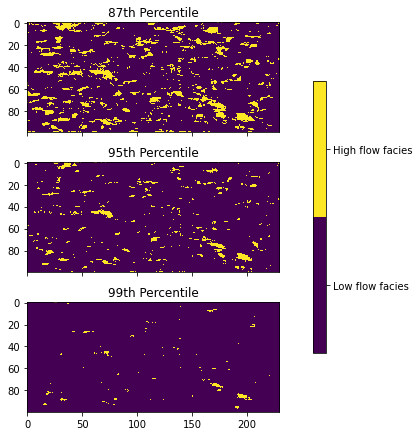

In [181]:
# get high conductivity at ground surface
qz_plt = np.zeros((100,230))
qz_plt[rows,cols] = qz[tprogs_lay[rows,cols],rows,cols] 


fig, ax = plt.subplots(3,1,figsize=(10,6), sharex=True)
fig.tight_layout(h_pad=2)

percentile_check = [87, 95, 99]
for n,i in enumerate(percentile_check):
    # split cells into low and high conductivity, based on chosen flow percentile
    qz_lay = np.zeros((100,230))
    qz_lay[qz_plt >= np.percentile(qz_plt,i)] = 1
    im = ax[n].imshow(qz_lay,cmap=cmap)
    ax[n].set_title(str(i)+'th Percentile')

cmap = mpl.cm.get_cmap('viridis', 2)    # 2 discrete colors
# color bar on all rows, with two discrete labels
cbar=plt.colorbar(mappable = im, ax=ax,  ticks = [0.25,.75], shrink= 0.7)
cbar.ax.set_yticklabels(['Low flow facies', 'High flow facies'])
# fig.tight_layout()
plt.savefig(fig_dir+'Comparison of high flow facies at ground surface with 87, 95, 99th percentiles.png',dpi=600)

In [46]:
flow_percentile = 95
# get high conductivity at ground surface
qz_plt = np.zeros((100,230))
qz_plt[rows,cols] = qz[tprogs_lay[rows,cols],rows,cols] 

# split cells into low and high conductivity, based on chosen flow percentile
qz_lay = np.zeros((100,230))
qz_lay[qz_plt >= np.percentile(qz_plt,flow_percentile)] = 1

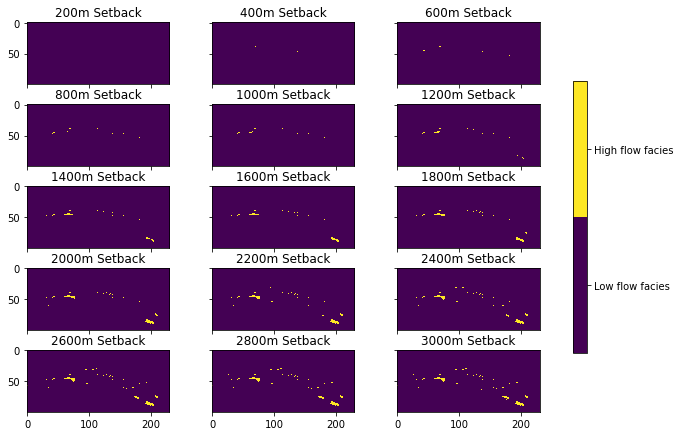

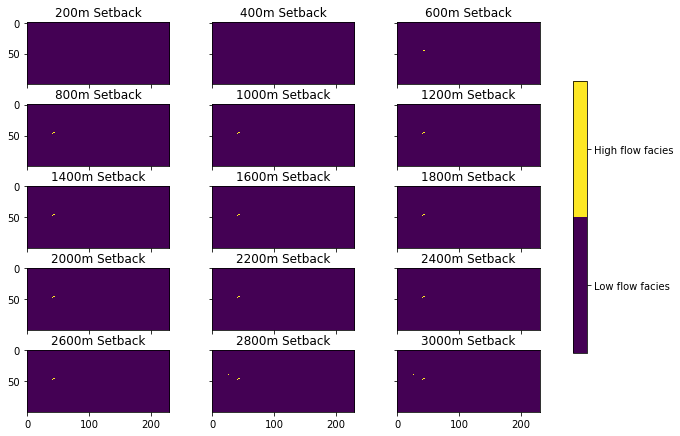

In [52]:
def plt_high_recharge_setback(qz_lay, str_setbacks,label):
    nx = 3
    ny = int(len(setbacks)/nx)
    fig, ax = plt.subplots(ny,nx,figsize=(10,6), sharex=True,sharey=True)
    fig.tight_layout(h_pad=1) # space between plots
    cmap = mpl.cm.get_cmap('viridis', 2)    # 2 discrete colors
    n=0
    for x in np.arange(0,ny):
        for y in np.arange(0,nx):
            temp = np.zeros(qz_lay.shape)
            temp[str_setbacks[n,:,:].astype('bool')] = qz_lay[str_setbacks[n,:,:].astype('bool')]
            im = ax[x,y].imshow(temp,cmap=cmap)
            ax[x,y].set_title(str(200+200*n)+'m Setback')
            n+=1

    # color bar on all rows, with two discrete labels
    cbar=plt.colorbar(mappable = im, ax=ax,  ticks = [0.25,.75], shrink= 0.7)
    cbar.ax.set_yticklabels(['Low flow facies', 'High flow facies'])

    plt.savefig(fig_dir+'Comparison of ' + str(flow_percentile)+'th flow facies for '+ label+' setback distances.png',dpi=600)
plt_high_recharge_setback(qz_lay, str_setbacks,label='regional')
plt_high_recharge_setback(qz_lay, local_str_setbacks,label='local')

The plots of setback distance and high flow cells at ground surface make the 99th percentile look very sparse and the 95th percentile look more reasonable.

We want to vectorize the raster to find:
1. The number of unique high flow groups
2. The area of each high flow group
3. The mean, max, min, median and variance of area
3. Location? Not needed as it will be summed anyway  

In a dataframe there will be one one row for each realization times the number of setbacks with columns for the mean, median, max, min, and variance of the area of high flow cells.
Need to iterate over 1. realization 2. setbacks to adjust what are considered high flow cells 3. count groups and area of high flow cells. Must iterate over setback first because a setback may split a group into two or cut off part of a group unlike the cumulative area analysis.

In [ ]:
#             qz_lay_setback = np.zeros((100,230)) # overlap high flow cells with setback distance
#             qz_lay_setback[str_setbacks[0,:,:].astype('bool')] = qz_lay[str_setbacks[0,:,:].astype('bool')]
# #             hf = qz_lay[str_setbacks[n,:,:].astype('bool')]
#             hf_tot[r,n] = qz_lay_setback.sum() # hf.sum()
#             qz_lay_setback_local = np.zeros((100,230)) # overlap high flow cells with local setback distance
#             qz_lay_setback_local[local_str_setbacks[0,:,:].astype('bool')] = qz_lay[local_str_setbacks[0,:,:].astype('bool')]
#             #hf_local = qz_lay[local_str_setbacks[n,:,:].astype('bool')]
#             hf_tot_local[r,n] = qz_lay_setback_local.sum()#hf_local.sum()

In [208]:
def highflow_at_groundsurface(run_ws):
    ''' take Cell by Cell budget file and finds high flow cells by percentile
    then finds those that outcrop at ground surface'''
    cbb = flopy.utils.CellBudgetFile(run_ws+'/MF.cbc')
    # load velocity in z direction
    extcbb = flopy.utils.postprocessing.get_extended_budget(cbb)
    (qx, qy, qz) = flopy.utils.postprocessing.get_specific_discharge(vectors = extcbb, model=m)
    # convert flow to positive as it is all moving in the downward, -z direction
    qz *= -1

   # get high conductivity at ground surface
    qz_plt = np.zeros((100,230))
    qz_plt[rows,cols] = qz[tprogs_lay[rows,cols],rows,cols] 
    # split cells into low and high conductivity, based on chosen flow percentile
    qz_lay = np.zeros((100,230))
    qz_lay[qz_plt >= np.percentile(qz_plt,flow_percentile)] = 1
    return(qz_lay)

In [244]:
def overlay_hf_setback(qz_lay, str_setbacks):
    qz_lay_setback = np.zeros((100,230)) # overlap high flow cells with setback distance
    qz_lay_setback[str_setbacks.astype('bool')] = qz_lay[str_setbacks.astype('bool')]
    #             hf = qz_lay[str_setbacks[n,:,:].astype('bool')]
    return(qz_lay_setback) # hf.sum()


In [361]:
from shapely.ops import Polygon
from rasterio.features import shapes, rasterize
# from shapely.geometry import MultiPoint
#, LineString, linemerge, polygonize, unary_union
# import pprint

def calc_area_stats(r, s, l, qz_lay, stat_cols):
    ''' for a given realizaiton and setback, find unique cell groups and take summary stats'''
    # The function shapes from rasterio requires uint8 format
    qz_lay_uint = qz_lay.astype(rasterio.uint8)
    # 'Values of False or 0 will be excluded from feature generation'
    out = shapes(qz_lay_uint, mask=qz_lay.astype(bool), connectivity = 8)
    alldata = list(out)
    cell_stats = pd.DataFrame(np.zeros((1,len(stat_cols))), columns=stat_cols)
    num_cells = np.zeros((len(alldata)))
    # iterate over all high flow cell groups
    for i in np.arange(0,len(alldata)):
        # coordinates are in terms of row and column number
        grp_coords = alldata[i][0].get('coordinates')[0]
        # the polygon area corresponds to the number of cells included
        grp_poly = Polygon(grp_coords)
        # grp_poly = MultiPoint(temp) # method to check corners
        num_cells[i] = grp_poly.area
    if len(num_cells)!=0: #if a realization has no cells then leave as zeros
        # calculate statistics for given realization, setback
        cell_stats = cell_stats.assign(Num_Grps = len(num_cells), Mean = num_cells.mean(), Median = np.median(num_cells), 
                                       Min = num_cells.min(),Max = num_cells.max(), Variance = num_cells.var(),
                                       Realization = r, Setback = s)
    if 'Location' in stat_cols:
        cell_stats.Location = l
    return(cell_stats)

In [373]:

def high_flow_count(flow_percentile, str_setbacks, local_str_setbacks):
    tic = time.time()
    # will count total number of cells for each setback distance and for all 100 realizations
    hf_tot = np.zeros((100,len(setbacks)))
    # layer for each local setback
    num_sites = len(np.unique(local_str_setbacks))-1
    hf_tot_local = np.zeros((num_sites, 100,len(setbacks)))

    # dataframe for grouping and area analysis
    stat_cols = ['Num_Grps','Mean','Median','Min','Max','Variance','Realization', 'Setback']
    cell_stats_all = pd.DataFrame(np.zeros((100*len(str_setbacks),len(stat_cols))), columns=stat_cols)
    local_cols = stat_cols+['Location']
    cell_stats_all_local = pd.DataFrame(np.zeros((num_sites*100*len(str_setbacks),len(local_cols))), columns=local_cols)
    
    k=0 # counter 
    kl = 0 # local counter
    for r in np.arange(0,100):
        print('Realization', r, ' time since start ',(time.time()-tic)/60)
        folder = '/realization'+ str(r).zfill(3)+'/'
        run_ws = model_ws+folder
        
        qz_lay = highflow_at_groundsurface(run_ws)

        # complete analysis for regional and local setbacks
        for n in np.arange(0,len(setbacks)):
            # overlay high flow cells with setback distance
            qz_lay_setback = overlay_hf_setback(qz_lay, str_setbacks[n,:,:])
            # calculate total cells in each setback
            hf_tot[r,n] = qz_lay_setback.sum()
            # calculate high flow groups and summary statistics
            cell_stats_all.iloc[k] = calc_area_stats(r,n, 0, qz_lay_setback, stat_cols)
            # iterate over local setbacks
            for l in np.unique(local_str_setbacks)[1:].astype(int):
                arr = np.zeros(local_str_setbacks[n,:,:].shape)
                arr[local_str_setbacks[n,::]==l] = 1
                qz_lay_setback_local = overlay_hf_setback(qz_lay, arr)
                hf_tot_local[l-1,r,n] = qz_lay_setback_local.sum()
                cell_stats_all_local.iloc[kl] = calc_area_stats(r,n,l, qz_lay_setback_local, local_cols)
                kl+=1
            k +=1
    hf_tot_df = pd.DataFrame(hf_tot, columns = setbacks)
    hf_tot_local_df = pd.DataFrame(hf_tot_local, columns = setbacks)
    # save counted high flow cells to a csv
    hf_tot_df.to_csv(data_dir+'surface_highflow_by_distance_regional_'+str(flow_percentile)+'.csv', index=False)
    hf_tot_local_df.to_csv(data_dir+'surface_highflow_by_distance_local_'+str(flow_percentile)+'.csv', index=False)
    # save grouping analysis and area statistics
    cell_stats_all.to_csv(data_dir+'surface_highflow_cells_statistics_regional'+str(flow_percentile)+'.csv', index=False)
    cell_stats_all_local.to_csv(data_dir+'surface_highflow_cells_statistics_local'+str(flow_percentile)+'.csv', index=False)

    toc = time.time()
    print('Total time was', (toc-tic)/60, 'minutes')

In [382]:
hf_tot_local = np.zeros((3, 100,len(setbacks)))
(hf_tot_local)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [276]:
# r,s = 1,0
# folder = '/realization'+ str(r).zfill(3)+'/'
# run_ws = model_ws+folder
# qz_lay = highflow_at_groundsurface(run_ws)
# for n in np.arange(0,17):
#     qz_lay_setback_local = overlay_hf_setback(qz_lay, local_str_setbacks[n,:,:])
#     print(qz_lay_setback_local.sum())
#     qz_lay = qz_lay_setback_local
#     # calc_area_stats(1,0, qz_lay_setback_local)
#     # The function shapes from rasterio requires uint8 format
#     qz_lay_uint = qz_lay.astype(rasterio.uint8)
#     # 'Values of False or 0 will be excluded from feature generation'
#     out = shapes(qz_lay_uint, mask=qz_lay.astype(bool), connectivity = 8)
#     alldata = list(out)
#     cell_stats = pd.DataFrame(np.zeros((1,len(stat_cols))), columns=stat_cols)


In [224]:
num_cells = np.zeros((len(alldata)))
# iterate over all high flow cell groups
for i in np.arange(0,len(alldata)):
    # coordinates are in terms of row and column number
    grp_coords = alldata[i][0].get('coordinates')[0]
    # the polygon area corresponds to the number of cells included
    grp_poly = Polygon(grp_coords)
    # grp_poly = MultiPoint(temp) # method to check corners
    num_cells[i] = grp_poly.area
if len(num_cells)!=0:
# calculate statistics for given realization, setback
cell_stats = cell_stats.assign(Mean = num_cells.mean(), Median = np.median(num_cells), Min = num_cells.min(),
                  Max = num_cells.max(), Variance = num_cells.var(), Realization = r, Setback = s)

ValueError: zero-size array to reduction operation minimum which has no identity

In [374]:

high_flow_count(95, str_setbacks, local_str_setbacks)

Realization 0  time since start  0.00023320515950520833
Realization 1  time since start  0.03143333991368612
Realization 2  time since start  0.16515545845031737
Realization 3  time since start  0.3022353967030843
Realization 4  time since start  0.4364447395006816
Realization 5  time since start  0.5723339398701985
Realization 6  time since start  0.7072853088378906
Realization 7  time since start  0.8419695695241293
Realization 8  time since start  0.9779224991798401
Realization 9  time since start  1.1141522963841757
Realization 10  time since start  1.248279869556427
Realization 11  time since start  1.384000543753306
Realization 12  time since start  1.520721968015035
Realization 13  time since start  1.655392865339915
Realization 14  time since start  1.7906217972437541
Realization 15  time since start  1.9258150180180869
Realization 16  time since start  2.0638672431310017
Realization 17  time since start  2.201665012041728
Realization 18  time since start  2.339441005388896
Rea

ValueError: Must pass 2-d input. shape=(3, 100, 17)